In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Load Dataset

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1000,
                  n_features=64,
                  centers=10,
                  center_box=(-1, +1))

print(X.shape, y.shape)

(1000, 64) (1000,)


In [3]:
X[0]

array([-1.85557087,  2.73631013, -0.90056936,  0.76554909,  1.29427846,
       -0.01942715,  2.19650789,  3.40785708, -2.33352624, -1.48957416,
       -0.466377  , -1.67506591, -0.21039062,  0.28221792, -1.30545096,
       -2.12261254,  0.48565051,  0.41409964, -0.05552593, -0.16112735,
        0.44237619, -0.39759022, -0.66826113,  2.59539728,  0.48390654,
        1.19471028, -0.10479415,  0.22012138,  1.70416294,  0.70769583,
        0.06118743, -0.66923612,  1.83478895,  0.33259122,  0.98185049,
       -0.26609794, -0.60065166, -0.19564678, -0.6532099 ,  0.16171354,
        2.99283023, -0.25471812,  1.28612883,  0.07914852, -0.49550025,
        0.12795833,  2.01866021,  1.26079984, -1.59086108, -2.56186335,
        0.49468595, -1.20963455,  0.0168326 ,  0.25008262, -0.98000627,
        0.05943163,  0.90930886, -0.12529292,  1.42110746,  1.35656943,
        0.40715632,  0.45538506, -0.56048025,  1.06366481])

In [4]:
y[0:5]

array([6, 7, 5, 4, 2])

### Visualize

In [5]:
# plt.scatter(X[:, 0], X[:, 1], c=y.ravel())

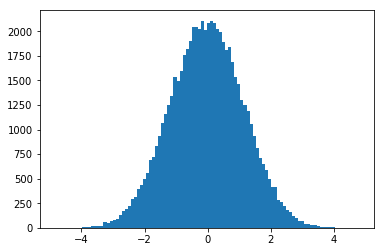

In [6]:
X.mean(), X.min(), X.max()

plt.hist(X.ravel(), bins=100)

tmp = 3

## Preprocessing

### One Hot Encode Label

In [7]:
y_hot = np.eye(10)[y]

print(y.shape, y_hot.shape)
y_hot[:10]

(1000,) (1000, 10)


array([[ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

## Define Activate Functions

### Sigmoid

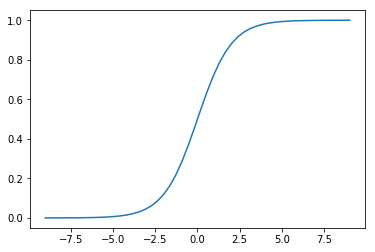

In [8]:
def sigmoid(n):
    return 1 / (1 + np.exp(-n))

xx = np.linspace(-9, +9)
yy = sigmoid(xx)

plt.plot(xx, yy)

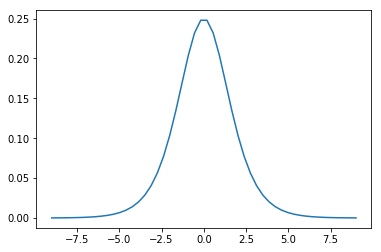

In [9]:
def sigmoid_derivative(n):
    return sigmoid(n) * (1 - sigmoid(n))

xx = np.linspace(-9, +9)
yy = sigmoid_derivative(xx)

plt.plot(xx, yy)

### tanh

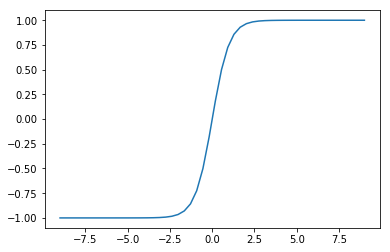

In [10]:
def tanh(x):
    return np.tanh(x)

xx = np.linspace(-9, +9)
yy = tanh(xx)

plt.plot(xx, yy)

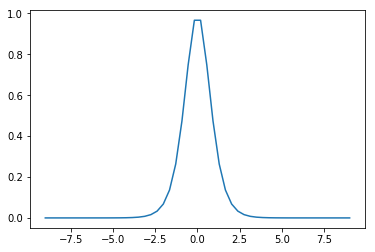

In [11]:
def tanh_derivative(x):
    return 1.0 - np.tanh(x) ** 2

xx = np.linspace(-9, +9)
yy = tanh_derivative(xx)

plt.plot(xx, yy)

### ReLU

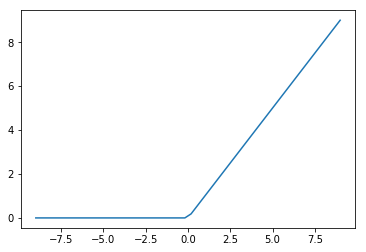

In [12]:
def relu(n):
    return n * (n > 0)

xx = np.linspace(start=-9, stop=+9)
yy = relu(xx)

plt.plot(xx, yy)

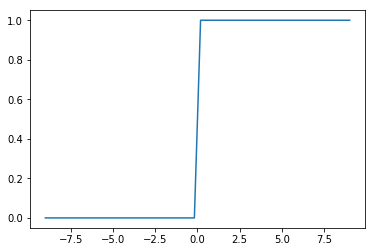

In [13]:
def relu_derivative(n):
    return 1 * (n > 0)

xx = np.linspace(start=-9, stop=+9)
yy = relu_derivative(xx)

plt.plot(xx, yy)

### Cross Entropy

In [14]:
def cross_entropy(actual, predict, eps=1e-15):
    actual = np.array(actual)
    predict = np.array(predict)

    clipped_predict = np.minimum(np.maximum(predict, eps), 1 - eps)

    loss = actual * np.log(clipped_predict) + (1 - actual) * np.log(1 - clipped_predict)
    
    return -1.0 * loss.mean()

### Plot

In [15]:
def plot_a(as_, range_=None):
    figure, axes = plt.subplots(nrows=1, ncols=9)
    figure.set_size_inches(24, 4)

    axes[0].hist(as_[0].ravel(), bins=100, range=range_)
    axes[1].hist(as_[1].ravel(), bins=100, range=range_)
    axes[2].hist(as_[2].ravel(), bins=100, range=range_)
    axes[3].hist(as_[3].ravel(), bins=100, range=range_)
    axes[4].hist(as_[4].ravel(), bins=100, range=range_)
    axes[5].hist(as_[5].ravel(), bins=100, range=range_)
    axes[6].hist(as_[6].ravel(), bins=100, range=range_)
    axes[7].hist(as_[7].ravel(), bins=100, range=range_)
    axes[8].hist(as_[8].ravel(), bins=100, range=range_)

In [16]:
def plot_dzs(dzs, range_=None):
    figure, axes = plt.subplots(nrows=1, ncols=8)
    figure.set_size_inches(24, 4)

    axes[0].hist(dzs[0].ravel(), bins=100, range=range_)
    axes[1].hist(dzs[1].ravel(), bins=100, range=range_)
    axes[2].hist(dzs[2].ravel(), bins=100, range=range_)
    axes[3].hist(dzs[3].ravel(), bins=100, range=range_)
    axes[4].hist(dzs[4].ravel(), bins=100, range=range_)
    axes[5].hist(dzs[5].ravel(), bins=100, range=range_)
    axes[6].hist(dzs[6].ravel(), bins=100, range=range_)
    axes[7].hist(dzs[7].ravel(), bins=100, range=range_)

### Build a Model

In [17]:
from time import time

def train(X, y, num_epoch, learning_rate, weight_initializer, activation, activation_derivative):
    w1 = weight_initializer(64, 100)
    w2 = weight_initializer(100, 100)
    w3 = weight_initializer(100, 100)
    w4 = weight_initializer(100, 100)
    w5 = weight_initializer(100, 100)
    w6 = weight_initializer(100, 100)
    w7 = weight_initializer(100, 100)
    w8 = weight_initializer(100, 100)
    w9 = weight_initializer(100, 10)
    
    b1 = np.zeros((1, 100))
    b2 = np.zeros((1, 100))
    b3 = np.zeros((1, 100))
    b4 = np.zeros((1, 100))
    b5 = np.zeros((1, 100))
    b6 = np.zeros((1, 100))
    b7 = np.zeros((1, 100))
    b8 = np.zeros((1, 100))
    b9 = np.zeros((1, 10))

    history = []
    start = time()
    
    for epoch in range(num_epoch):
        z1 = X.dot(w1) + b1
        a1 = activation(z1)
        z2 = a1.dot(w2) + b2
        a2 = activation(z2)
        z3 = a2.dot(w3) + b3
        a3 = activation(z3)
        z4 = a3.dot(w4) + b4
        a4 = activation(z4)
        z5 = a4.dot(w5) + b5
        a5 = activation(z5)

        z6 = a5.dot(w6) + b6
        a6 = activation(z6)
        z7 = a6.dot(w7) + b7
        a7 = activation(z7)
        z8 = a7.dot(w8) + b8
        a8 = activation(z8)
        z9 = a8.dot(w9) + b9
        a9 = sigmoid(z9)

        y_predict = np.argmax(a9, axis=1)
        accuracy = (y_predict == y).mean()
        
        loss = cross_entropy(y_hot, a9)

        history.append({
            'epoch': epoch,
            'elapsed': time() - start,
            'accuracy': accuracy,
            'loss': loss,
        })

        if epoch % (num_epoch / 10) == 0:
            print("{0:3} accuracy = {1:.5f}, loss = {2:.5f}".format(epoch, accuracy, loss))

        if accuracy > 0.99:
            break

        d9 = (a9 - y_hot)

        d8 = d9.dot(w9.T) * activation_derivative(a8)
        d7 = d8.dot(w8.T) * activation_derivative(a7)
        d6 = d7.dot(w7.T) * activation_derivative(a6)
        d5 = d6.dot(w6.T) * activation_derivative(a5)
        d4 = d5.dot(w5.T) * activation_derivative(a4)
        d3 = d4.dot(w4.T) * activation_derivative(a3)
        d2 = d3.dot(w3.T) * activation_derivative(a2)
        d1 = d2.dot(w2.T) * activation_derivative(a1)

        w9 = w9 - learning_rate * a8.T.dot(d9)
        w8 = w8 - learning_rate * a7.T.dot(d8)
        w7 = w7 - learning_rate * a6.T.dot(d7) 
        w6 = w6 - learning_rate * a5.T.dot(d6)
        w5 = w5 - learning_rate * a4.T.dot(d5)
        w4 = w4 - learning_rate * a3.T.dot(d4)
        w3 = w3 - learning_rate * a2.T.dot(d3) 
        w2 = w2 - learning_rate * a1.T.dot(d2)
        w1 = w1 - learning_rate * X.T.dot(d1)

        b9 = b9 - d9.mean(axis=0)
        b8 = b8 - d8.mean(axis=0)
        b7 = b7 - d7.mean(axis=0)
        b6 = b6 - d6.mean(axis=0)
        b5 = b5 - d5.mean(axis=0)
        b4 = b4 - d4.mean(axis=0)
        b3 = b3 - d3.mean(axis=0)
        b2 = b2 - d2.mean(axis=0)
        b1 = b1 - d1.mean(axis=0)

    print("----" * 10)
    print("{0:3} accuracy = {1:.5f}, loss = {2:.5f}".format(epoch, accuracy, loss))
   
    dz2 = activation_derivative(z1).dot(w2) # dz2 / dz1
    dz3 = activation_derivative(z2).dot(w3) # dz3 / dz2
    dz4 = activation_derivative(z3).dot(w4) # dz4 / dz3
    dz5 = activation_derivative(z4).dot(w5) # dz5 / dz4
    dz6 = activation_derivative(z5).dot(w6) # dz6 / dz5
    dz7 = activation_derivative(z6).dot(w7) # dz7 / dz6
    dz8 = activation_derivative(z7).dot(w8) # dz8 / dz7
    dz9 = activation_derivative(z8).dot(w9) # dz9 / dz8
    
    as_ = [a1, a2, a3, a4, a5, a6, a7, a8, a9]
    dzs = [dz2, dz3, dz4, dz5, dz6, dz7, dz8, dz9]

    return accuracy, as_, dzs, history


### Case 1 - Small Random Number + Sigmoid

In [18]:
def small_random_number(fan_in, fan_out):
    return np.random.randn(fan_in, fan_out) * 0.05

num_epoch = 100
learning_rate = 0.0003

accuracy, as_, dzs, sigmoid_history = train(X, y, num_epoch, learning_rate,
                                            weight_initializer=small_random_number,
                                            activation=sigmoid,
                                            activation_derivative=sigmoid_derivative)

  0 accuracy = 0.10000, loss = 0.68643
 10 accuracy = 0.10000, loss = 0.32508
 20 accuracy = 0.08000, loss = 0.32508
 30 accuracy = 0.07900, loss = 0.32508
 40 accuracy = 0.07900, loss = 0.32508
 50 accuracy = 0.07900, loss = 0.32508
 60 accuracy = 0.07900, loss = 0.32508
 70 accuracy = 0.07900, loss = 0.32508
 80 accuracy = 0.07900, loss = 0.32508
 90 accuracy = 0.07900, loss = 0.32508
----------------------------------------
 99 accuracy = 0.07900, loss = 0.32508


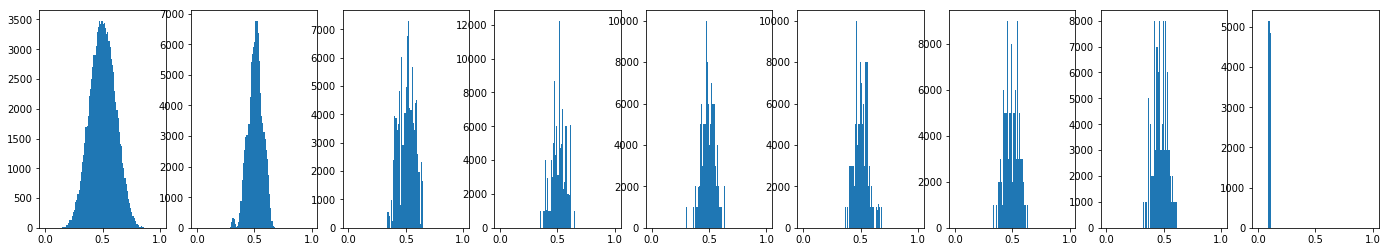

In [19]:
plot_a(as_, range_=(0.0, 1.0))

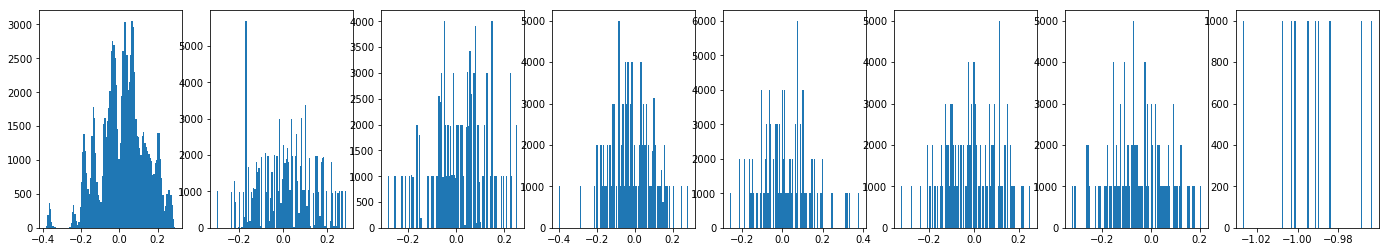

In [20]:
plot_dzs(dzs)

### Case 2 - Small Random Number + tanh

In [21]:
def small_random_number(fan_in, fan_out):
    return np.random.randn(fan_in, fan_out) * 0.05

num_epoch = 100
learning_rate = 0.0003

error, as_, dzs, tanh_history = train(X, y, num_epoch, learning_rate,
                                      weight_initializer=small_random_number,
                                      activation=tanh,
                                      activation_derivative=tanh_derivative)

  0 accuracy = 0.13900, loss = 0.69314
 10 accuracy = 0.11000, loss = 0.32502
 20 accuracy = 0.23800, loss = 0.32497
 30 accuracy = 0.28400, loss = 0.32492
 40 accuracy = 0.35000, loss = 0.32487
 50 accuracy = 0.40600, loss = 0.32480
 60 accuracy = 0.45900, loss = 0.32471
 70 accuracy = 0.49700, loss = 0.32458
 80 accuracy = 0.51800, loss = 0.32439
 90 accuracy = 0.52000, loss = 0.32407
----------------------------------------
 99 accuracy = 0.49600, loss = 0.32351


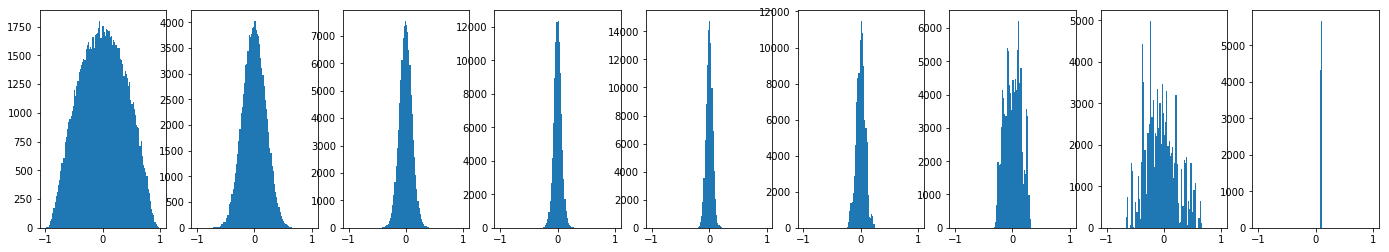

In [22]:
plot_a(as_, range_=(-1.0, +1.0))

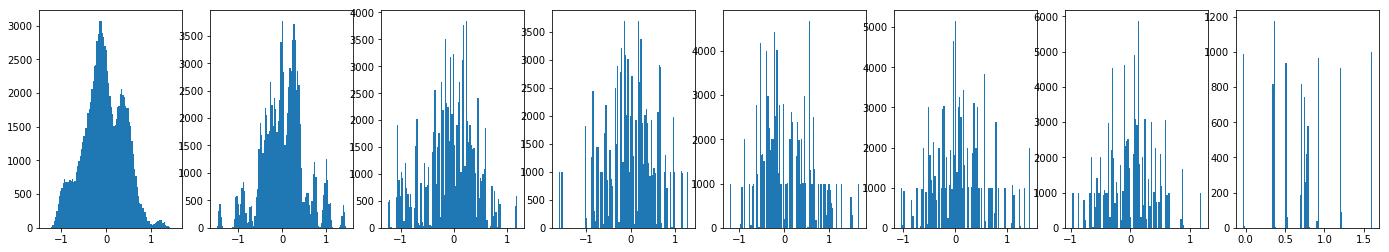

In [23]:
plot_dzs(dzs)

### Case 3 - Xavior Initialization + tanh

In [24]:
def xavior_initialization(fan_in, fan_out):
    a = np.sqrt(6 / (fan_in + fan_out))
    
    return np.random.uniform(low=-a,  high=+a, size=(fan_in, fan_out))

num_epoch = 100
learning_rate = 0.0003

error, as_, dzs, xavior_tanh_history = train(X, y, num_epoch, learning_rate,
                                             weight_initializer=xavior_initialization,
                                             activation=tanh,
                                             activation_derivative=tanh_derivative)

  0 accuracy = 0.15900, loss = 0.68844
 10 accuracy = 0.74400, loss = 0.17025
 20 accuracy = 0.95300, loss = 0.06993
----------------------------------------
 26 accuracy = 0.99100, loss = 0.04082


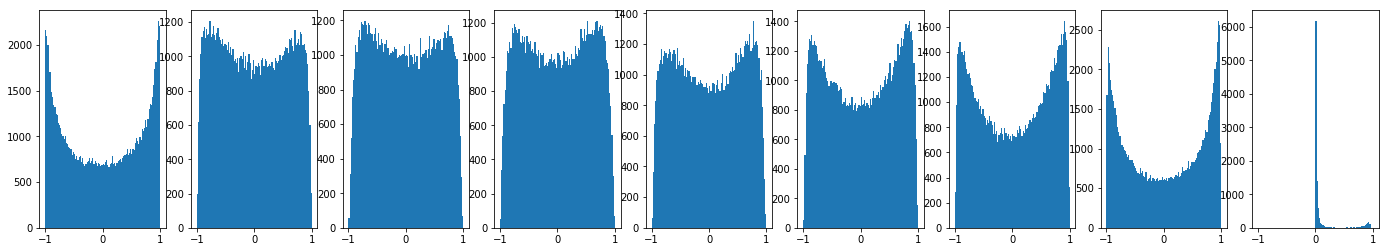

In [25]:
plot_a(as_, range_=(-1.0, +1.0))

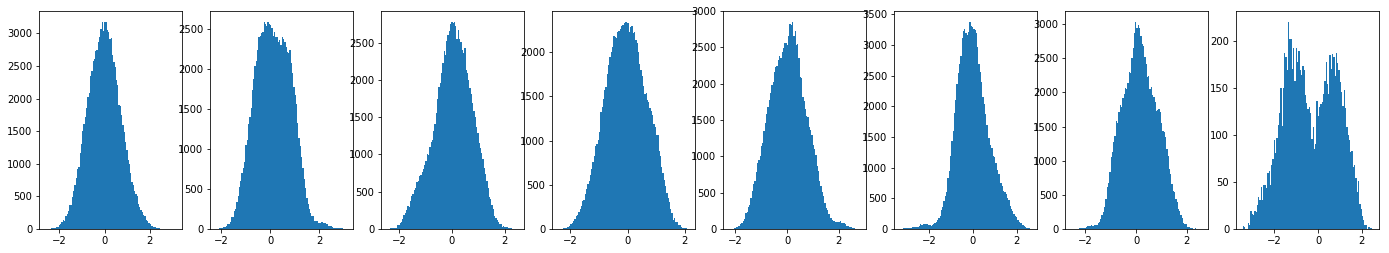

In [26]:
plot_dzs(dzs)

### Visualize

In [27]:
import pandas as pd

sigmoid_history = pd.DataFrame(sigmoid_history[0:100])
tanh_history = pd.DataFrame(tanh_history)
xavior_tanh_history = pd.DataFrame(xavior_tanh_history)

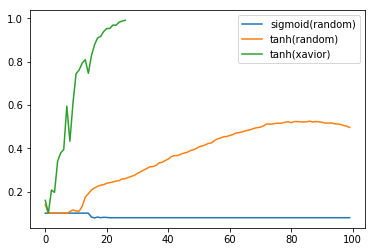

In [28]:
plt.plot(sigmoid_history['epoch'], sigmoid_history['accuracy'], label="sigmoid(random)")
plt.plot(tanh_history['epoch'], tanh_history['accuracy'], label="tanh(random)")
plt.plot(xavior_tanh_history['epoch'], xavior_tanh_history['accuracy'], label="tanh(xavior)")

plt.legend()

### Case 4 - Xavior Initialization + ReLU

In [29]:
def xavior_initialization(fan_in, fan_out):
    a = np.sqrt(6 / (fan_in + fan_out))
    
    return np.random.uniform(low=-a,  high=+a, size=(fan_in, fan_out))

num_epoch = 100
learning_rate = 0.00003

error, as_, dzs, xavior_relu_history = train(X, y, num_epoch, learning_rate,
                                             weight_initializer=xavior_initialization,
                                             activation=relu,
                                             activation_derivative=relu_derivative)

  0 accuracy = 0.09000, loss = 0.68697
 10 accuracy = 0.14400, loss = 0.32294
 20 accuracy = 0.30000, loss = 0.32090
 30 accuracy = 0.36800, loss = 0.31880
 40 accuracy = 0.41700, loss = 0.31589
 50 accuracy = 0.45400, loss = 0.31197
 60 accuracy = 0.48500, loss = 0.30603
 70 accuracy = 0.51300, loss = 0.29642
 80 accuracy = 0.55200, loss = 0.28135
 90 accuracy = 0.58300, loss = 0.25877
----------------------------------------
 99 accuracy = 0.51100, loss = 0.25224


### Case 5 - He Initialization + ReLU

In [30]:
def he_initialization(fan_in, fan_out):
    a = np.sqrt(6 / fan_in)
    
    return np.random.uniform(low=-a,  high=+a, size=(fan_in, fan_out))

num_epoch = 100
learning_rate = 0.00003

error, as_, dzs, he_relu_history = train(X, y, num_epoch, learning_rate,
                                         weight_initializer=he_initialization,
                                         activation=relu,
                                         activation_derivative=relu_derivative)

  0 accuracy = 0.11100, loss = 0.93698
 10 accuracy = 0.28100, loss = 0.31217
 20 accuracy = 0.39800, loss = 0.28521
 30 accuracy = 0.54800, loss = 0.24716
 40 accuracy = 0.43700, loss = 0.25020
 50 accuracy = 0.55100, loss = 0.20213
 60 accuracy = 0.79100, loss = 0.13599
 70 accuracy = 0.66900, loss = 0.15647
 80 accuracy = 0.67000, loss = 0.18638
 90 accuracy = 0.89300, loss = 0.07612
----------------------------------------
 99 accuracy = 0.94700, loss = 0.03968


### Visualize

In [31]:
xavior_relu_history = pd.DataFrame(xavior_relu_history)
he_relu_history = pd.DataFrame(he_relu_history)

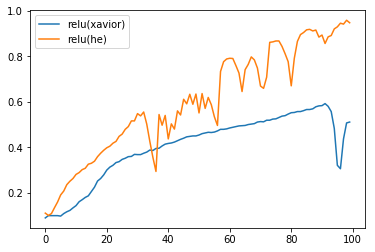

In [32]:
plt.plot(xavior_relu_history['epoch'], xavior_relu_history['accuracy'], label="relu(xavior)")
plt.plot(he_relu_history['epoch'], he_relu_history['accuracy'], label="relu(he)")

plt.legend()

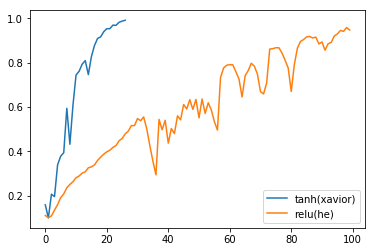

In [33]:
plt.plot(xavior_tanh_history['epoch'], xavior_tanh_history['accuracy'], label="tanh(xavior)")
plt.plot(he_relu_history['epoch'], he_relu_history['accuracy'], label="relu(he)")
plt.legend()